# Vertical atmospheric transparency 

- author : Sylvie Dagoret-Campagne
- date : April 26th 2018
- update : April 27th 2018

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
from astropy.io import fits
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages 
from matplotlib.colors import LogNorm

In [25]:
from astropy.io import fits

In [26]:
#  column 0 : count number
#  column 1 : aerosol value
#  column 2 : pwv value
#  column 3 : ozone value
#  column 6 : data start 
#
index_atm_count=0
index_atm_aer=1
index_atm_pwv=2
index_atm_oz=3
index_atm_ps=4
index_atm_cloud=5
index_atm_data=6

NB_atm_HEADER=6
#NB_atm_DATA=len(WL)-1

In [27]:
file_simu='MERRA2_2017_M2I1NXASM_M2T1NXAER_M2T1NXRAD_ctio_atmsim.fits'
hdu = fits.open(file_simu)
data=hdu[0].data

In [28]:
file_merra2='MERRA2_2017_M2I1NXASM_M2T1NXAER_M2T1NXRAD_ctio_AllYear.csv'
df_merra2=pd.read_csv(file_merra2,index_col=0)
df_merra2.index.name='time'
# convert the string into timestamp
#-------------------------------------
all_datetime_merra2=pd.to_datetime(df_merra2.index.get_values())

In [29]:
file_logbook_ctio='ctiofulllogbook_jun2017_v4.csv'
df_ctio=pd.read_csv(file_logbook_ctio,sep=';')
df_ctio=df_ctio.reindex(columns=['date','P','T','RH','airmass','seeing','exposure','object','filter','disperser','focus','W','subdir','file']).set_index('date').sort_index()

In [30]:
df_ctio

,P,T,RH,airmass,seeing,exposure,object,filter,disperser,focus,W,subdir,file
date,,,,,,,,,,,,,
2017-05-28T01:36:40.705,779,"5,6",60,"1,009","1,443",5,pointing,dia,Thor300,0,"8,9",data_26may17,reduc_20170526_001.fits
2017-05-28T01:41:52.197,780,"5,6",60,"1,007","1,39",5,pointing,dia,Ron400,0,"10,8",data_26may17,reduc_20170526_002.fits
2017-05-28T01:46:06.150,779,"5,9",59,"1,057","1,255",5,pointing,dia,Ron400,0,"6,8",data_26may17,reduc_20170526_003.fits
2017-05-28T01:50:31.257,779,"5,9",57,"1,057","1,409",5,pointing,dia,Ron400,0,"9,1",data_26may17,reduc_20170526_004.fits
2017-05-28T01:58:18.598,779,"5,9",0,"1,058","1,293",5,pointing,dia,Ron400,0,"14,7",data_26may17,reduc_20170526_005.fits
2017-05-28T02:03:27.503,779,"5,9",0,"1,06","1,197",1,pointing,dia,Ron400,0,"10,7",data_26may17,reduc_20170526_006.fits
2017-05-28T02:06:07.849,779,"6,1",51,"1,061","1,227",1,pointing,dia,Ron400,0,"13,6",data_26may17,reduc_20170526_007.fits
2017-05-28T02:07:46.850,779,"6,2",0,"1,061","1,154",1,pointing,dia,Ron400,0,"16,6",data_26may17,reduc_20170526_008.fits
2017-05-28T02:09:32.599,779,6,53,"1,062","1,533",1,pointing,dia,Ron400,0,"13,4",data_26may17,reduc_20170526_009.fits


In [31]:
data.shape

(2929, 957)

In [32]:
transp=data[1:,index_atm_data:]
WL=data[0,index_atm_data:]

In [33]:
transp_sum=np.sum(transp,axis=1)

In [34]:
len(transp_sum)

2928

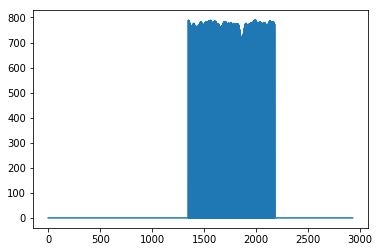

In [35]:
plt.plot(transp_sum)

In [36]:
selected_indexes=np.where(transp_sum>0)[0]

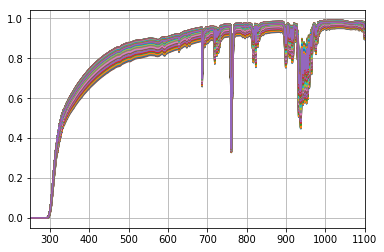

In [37]:
for idx in selected_indexes:
    plt.plot(WL,transp[idx,:])
    plt.grid()
    plt.xlim(WL[0],1100)

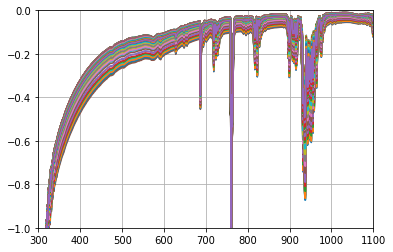

In [38]:
for idx in selected_indexes:
    plt.plot(WL[50:],2.5*np.log10(transp[idx,50:]))
    plt.grid()
    plt.xlim(WL[50],1100)
    plt.ylim(-1.,0.)

# Determination of photometric nights

In [39]:
 df_ctio.head()

,P,T,RH,airmass,seeing,exposure,object,filter,disperser,focus,W,subdir,file
date,,,,,,,,,,,,,
2017-05-28T01:36:40.705,779,"5,6",60,"1,009","1,443",5,pointing,dia,Thor300,0,"8,9",data_26may17,reduc_20170526_001.fits
2017-05-28T01:41:52.197,780,"5,6",60,"1,007","1,39",5,pointing,dia,Ron400,0,"10,8",data_26may17,reduc_20170526_002.fits
2017-05-28T01:46:06.150,779,"5,9",59,"1,057","1,255",5,pointing,dia,Ron400,0,"6,8",data_26may17,reduc_20170526_003.fits
2017-05-28T01:50:31.257,779,"5,9",57,"1,057","1,409",5,pointing,dia,Ron400,0,"9,1",data_26may17,reduc_20170526_004.fits
2017-05-28T01:58:18.598,779,"5,9",0,"1,058","1,293",5,pointing,dia,Ron400,0,"14,7",data_26may17,reduc_20170526_005.fits


In [40]:
# remove data_26may because all times are creazy time
# supressed'data_26may17'
all_subdirs=['data_28may17','data_29may17','data_30may17','data_31may17','data_01jun17','data_02jun17',
            'data_03jun17','data_04jun17','data_06jun17','data_08jun17','data_09jun17','data_10jun17',
            'data_12jun17','data_13jun17']

In [41]:
NB_SUBDIRS=len(all_subdirs)

## For each night get the time boundaries in the CTIO data

In [51]:
all_subdirs_starttime=[]
all_subdirs_stoptime=[]
for subdir in all_subdirs:
    df_ctio_subdir=df_ctio[df_ctio["subdir"]==subdir]
    print '==============================',subdir,'============================================'
    #print df_ctio["subdir"]==subdir
    #print df_ctio_subdir
    if subdir=='data_26may17':
        print df_ctio_subdir
        
    all_datetime_ctio_subdir=pd.to_datetime(df_ctio_subdir.index.get_values())
    start_time=all_datetime_ctio_subdir[0]
    stop_time=all_datetime_ctio_subdir[-1]
    print '\t Time Range of CTIO Data :',start_time, '==>',stop_time
    all_subdirs_starttime.append(start_time)
    all_subdirs_stoptime.append(stop_time)

============================== data_28may17 ============================================
	 Time Range of CTIO Data: 2017-05-28 22:46:48.252000 ==> 2017-05-29 07:35:34.656000
============================== data_29may17 ============================================
	 Time Range of CTIO Data: 2017-05-29 20:27:06.701000 ==> 2017-05-30 10:27:43.804000
============================== data_30may17 ============================================
	 Time Range of CTIO Data: 2017-05-30 21:17:00.652000 ==> 2017-05-31 10:42:16.450000
============================== data_31may17 ============================================
	 Time Range of CTIO Data: 2017-05-31 20:19:31.695000 ==> 2017-06-01 17:01:40.656000
============================== data_01jun17 ============================================
	 Time Range of CTIO Data: 2017-06-02 03:50:37.203000 ==> 2017-06-02 10:29:15.455000
============================== data_02jun17 ============================================
	 Time Range of CTIO Data: 2017-06-02 22:

## For each CTIO night, show the Merra-2 simulated atmospheric transparency profile

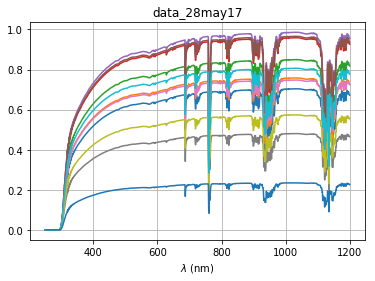

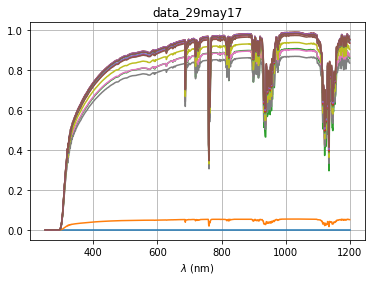

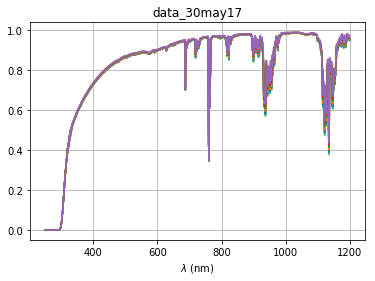

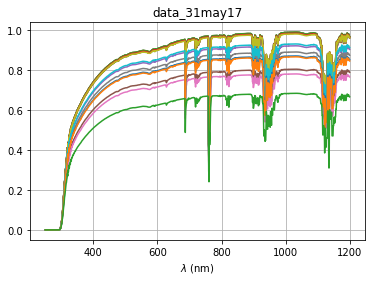

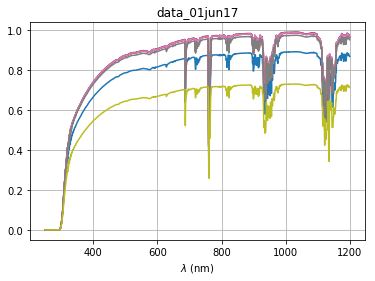

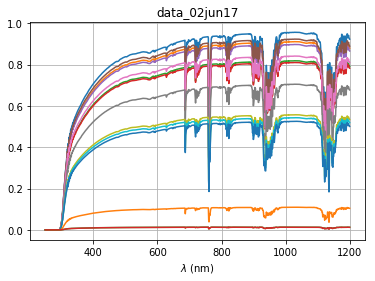

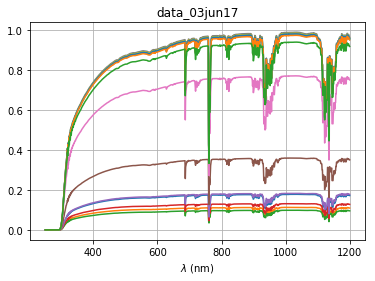

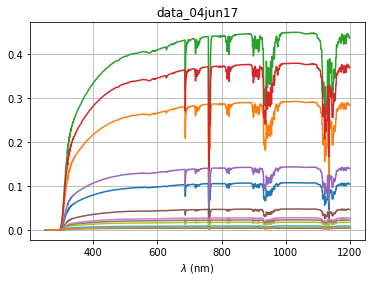

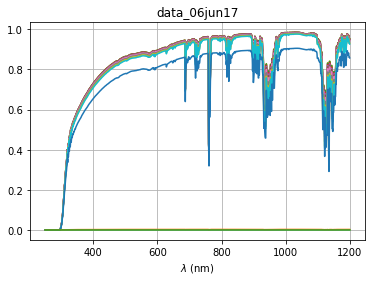

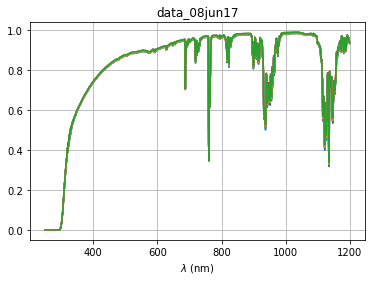

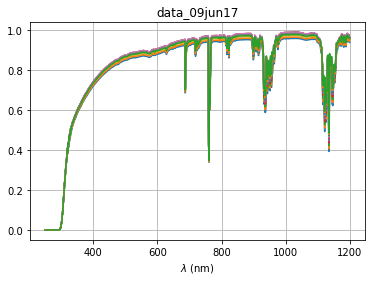

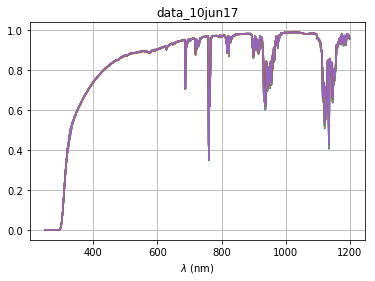

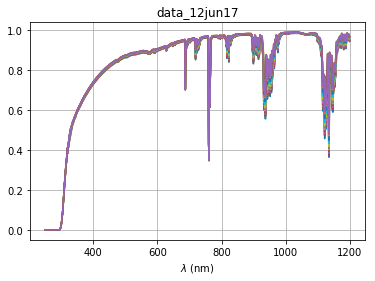

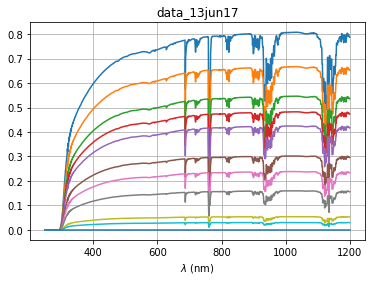

In [43]:
index_subd=0
# loop on subdir
for subdir in all_subdirs:
    plt.figure()
    plt.title(subdir)
    plt.xlabel('$\lambda$ (nm)')
    plt.grid(True)
    #loop on merra2 timestamp
    idx=0
    for timestamp in all_datetime_merra2:
        month=timestamp.month
        day=timestamp.days_in_month
        hour=timestamp.hour
        minu=timestamp.minute
    
        # goal take every hours pressure, PWV and Ozone, and average the aerosols and clouds 30 min before and 30 min after
        if minu==0:
            deltat_start=(timestamp-all_subdirs_starttime[index_subd]).total_seconds()
            deltat_stop=(timestamp-all_subdirs_stoptime[index_subd]).total_seconds()
            if deltat_start>=-3600 and deltat_stop<=3600:
                tau_cloud=data[idx+1,index_atm_cloud]  #(+1 because first row contains WL)
                att_cloud=np.exp(-tau_cloud)
                plt.plot(WL,att_cloud*transp[idx,:])
                
        idx+=1  # increase merra time
    index_subd+=1
    

## Same thing and produce a pdf file

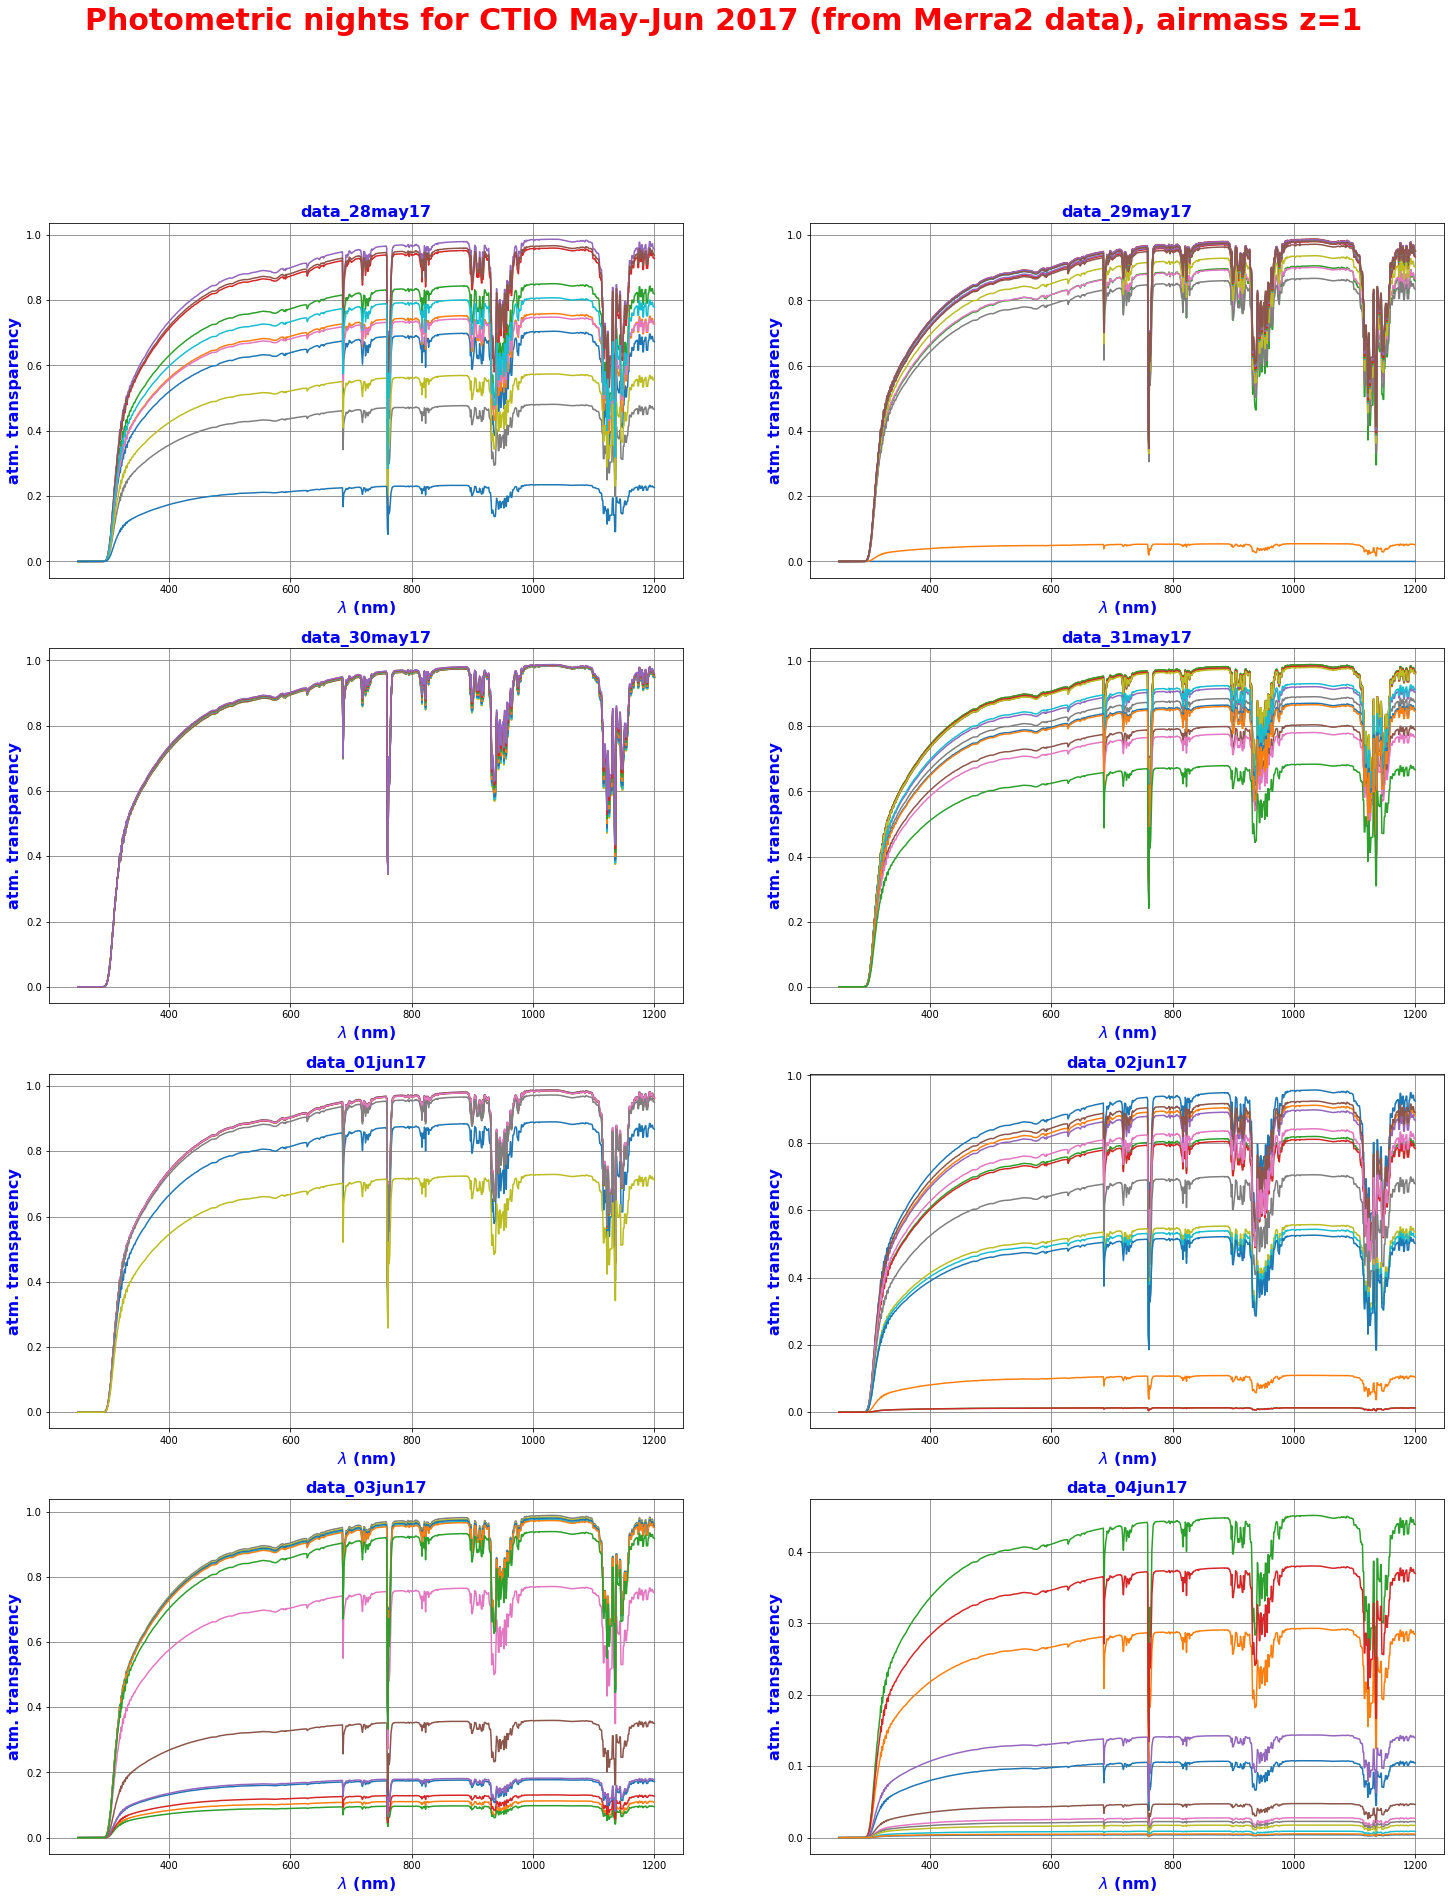

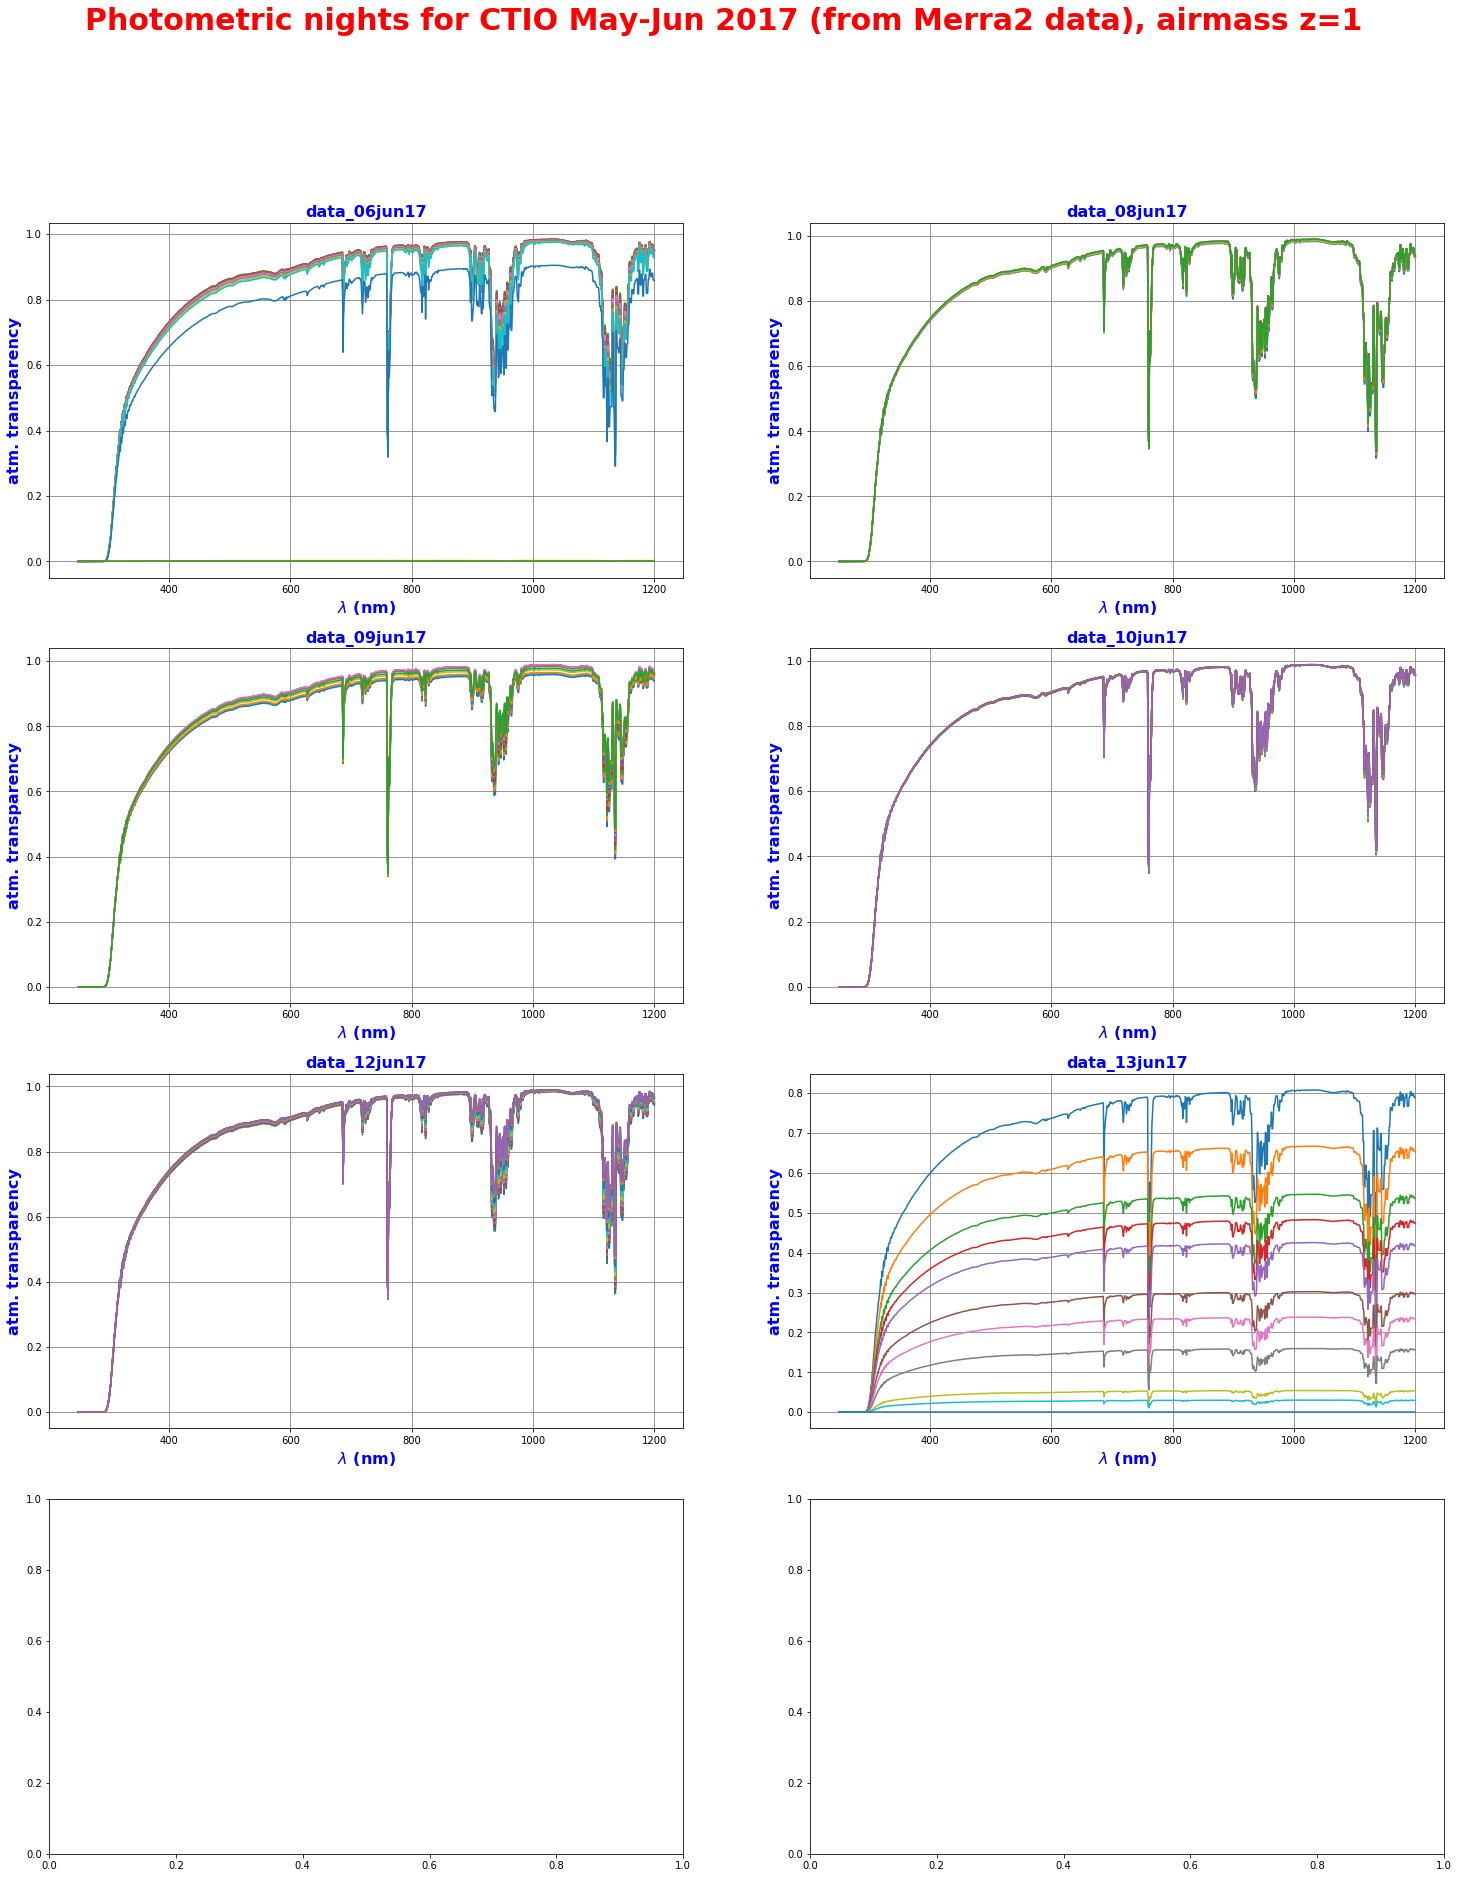

In [50]:
figfilename=os.path.join('photometric-nights.pdf')
pp = PdfPages(figfilename) # create a pdf file
title='Photometric nights for CTIO May-Jun 2017 (from Merra2 data), airmass z=1'
PageNum=0          # page counter
NBIMGPERROW=2
NBIMGROWPERPAGE=4




index_subd=0
# loop 1 on subdir
for subdir in all_subdirs:
    
    
    if index_subd%(NBIMGPERROW*NBIMGROWPERPAGE) == 0:
            f, axarr = plt.subplots(NBIMGROWPERPAGE,NBIMGPERROW,figsize=(25,30))
            f.suptitle(title,fontsize=30,fontweight='bold',color='red')
    
    
    # index of image in the page    
    indexcut=index_subd-PageNum*(NBIMGROWPERPAGE*NBIMGPERROW)    
    ix=indexcut%NBIMGPERROW
    iy=indexcut/NBIMGPERROW
    
    
    #loop 2 on merra2 timestamp
    idx=0
    for timestamp in all_datetime_merra2:
        month=timestamp.month
        day=timestamp.days_in_month
        hour=timestamp.hour
        minu=timestamp.minute
    
        # goal take every hours pressure, PWV and Ozone, and average the aerosols and clouds 30 min before and 30 min after
        if minu==0:
            deltat_start=(timestamp-all_subdirs_starttime[index_subd]).total_seconds()
            deltat_stop=(timestamp-all_subdirs_stoptime[index_subd]).total_seconds()
            if deltat_start>=-3600 and deltat_stop<=3600:
                tau_cloud=data[idx+1,index_atm_cloud]  #(+1 because first row contains WL)
                att_cloud=np.exp(-tau_cloud)
                axarr[iy,ix].plot(WL,att_cloud*transp[idx,:])
                axarr[iy,ix].set_title(subdir,color='blue',fontweight='bold',fontsize=16)
                axarr[iy,ix].set_xlabel("$\lambda$ (nm)",color='blue',fontweight='bold',fontsize=16)
                axarr[iy,ix].set_ylabel("atm. transparency",color='blue',fontweight='bold',fontsize=16)
                axarr[iy,ix].grid(color='grey', ls='solid')    
                
        idx+=1  # increase merra time
        
    # save a new page
    if (index_subd+1)%(NBIMGPERROW*NBIMGROWPERPAGE) == 0:
        #f.colorbar(im, orientation="horizontal")
        PageNum+=1  # increase page Number
        f.savefig(pp, format='pdf')
        f.show()
        
        
    index_subd+=1    # increase subdir counter
    
    
f.savefig(pp, format='pdf') 
f.show()
pp.close()
    